In [1]:
import os
import sys

project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))

# Check if the root directory is already in the system path
if project_root not in sys.path:
    sys.path.append(project_root)

from src import data_processing, model_algo
# Makes sure graphs load properly by using the proper src files. This is for users who access notebook through Binder

### Stephen Curry Basketball Stats Analysis and Predictor

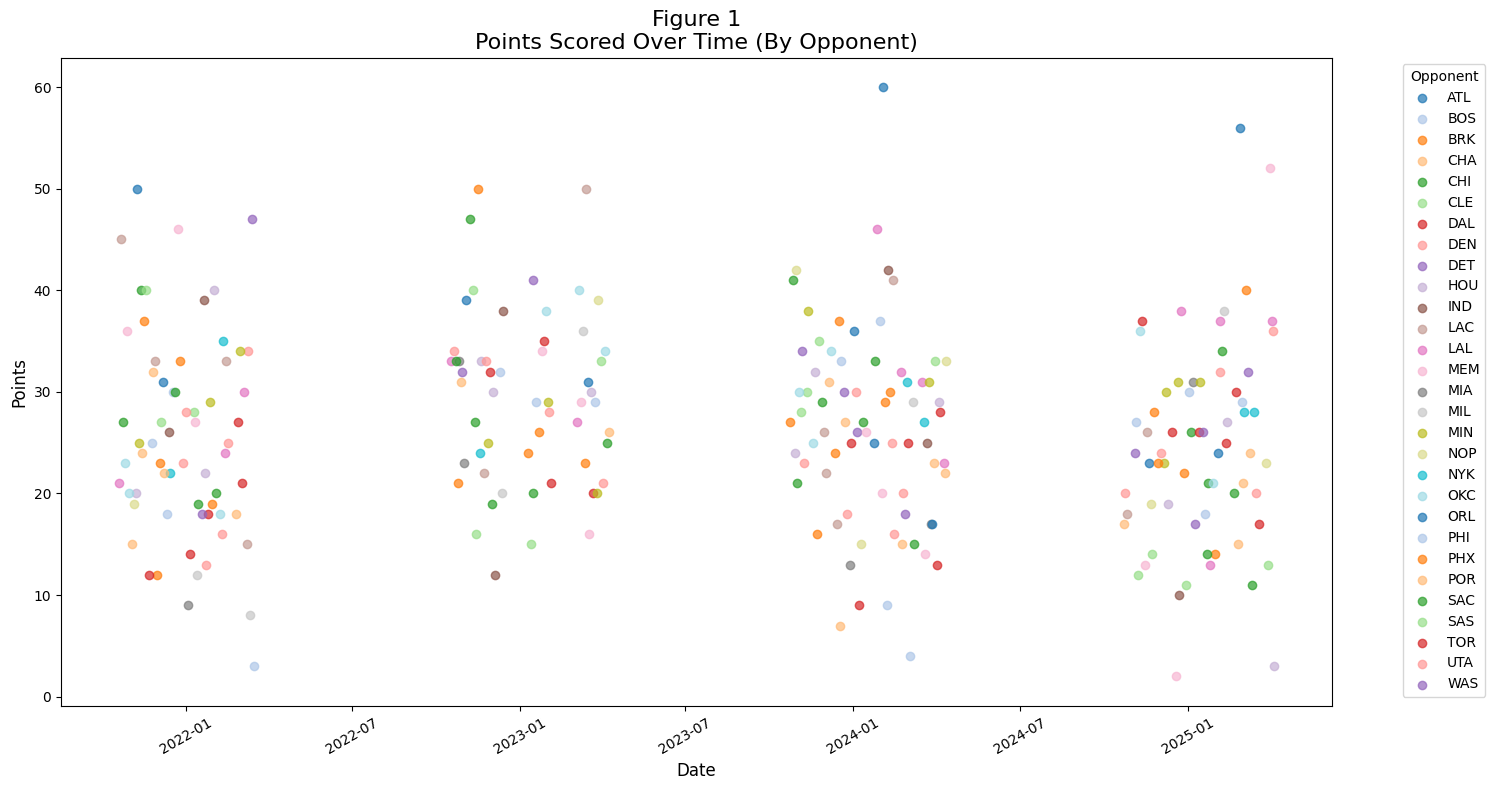

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from src.data_processing import load_and_prepare_data, group_by_opponent, calculate_points_stats

data = load_and_prepare_data()

grouped_active, inactive_games = group_by_opponent(data)

# Calculate summary statistics for points scored against each opponent
points_summary = calculate_points_stats(grouped_active)

# Ensure opponent names are strings for proper labeling (to avoid visualization issues)
points_summary["Opponent"] = points_summary["Opponent"].astype(str)

# Scatter Plot
opponent_colors = sns.color_palette("tab20", len(grouped_active))  # Use a palette like 'tab20' for distinct colors

plt.figure(figsize=(15, 8))

# Scatter plot for games over time, grouped by each opponent
for idx, (team, games) in enumerate(grouped_active):
    # Convert the Date column to datetime using the MM/DD/YY format
    games["Date"] = pd.to_datetime(games["Date"], format="%m/%d/%y", errors="coerce")  # Handle incorrect formats
    valid_games = games.dropna(subset=["Date"])  # Ensure no invalid dates are plotted

    # Assign color for each opponent
    color = opponent_colors[idx]

    plt.scatter(
        valid_games["Date"],  # Plot valid Date values
        valid_games["PTS"],  # Plot points scored
        label=team,
        color=color,
        alpha=0.7
    )

# Customize the chart
plt.title("Figure 1\nPoints Scored Over Time (By Opponent)", fontsize=16)
plt.ylabel("Points", fontsize=12)
plt.xlabel("Date", fontsize=12)
plt.xticks(rotation=30, fontsize=10)
plt.legend(title="Opponent", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()


Above in Figure 1, the scatter plot shows Stephen Curry's total points per game for every game he has played in the last four years. Each opponent he has faced is represented by a different color. The scatter plot provides a visual representation of the point distribution for each game across all seasons.

In [3]:

import pandas as pd
from IPython.display import display
from src.data_processing import (
    load_and_prepare_data,
    group_by_opponent,
    calculate_team_stats
)


data = load_and_prepare_data()


grouped_active, inactive_games = group_by_opponent(data)


stat_columns = [
    "FGA", "FG%", "3P", "3PA", "3P%", "2P", "2PA", "2P%",
    "eFG%", "FT", "FTA", "FT%", "ORB", "DRB", "TRB", "AST", "STL",
    "BLK", "TOV", "PF", "PTS", "GmSc", "+/-"
]

# Calculate team stats
team_stats_summary = calculate_team_stats(grouped_active, stat_columns)


styled_table = (
    team_stats_summary.style
    .hide(axis="index")  # Hide the default Pandas index
    .set_caption("Figure 2<br>Stephen Curry Box Statistics Against Each Opponent")
    .background_gradient(
        subset=team_stats_summary.columns.difference(["Opponent", "# Games"]),
        cmap="PuBu"  # Highlight numeric columns
    )
    .format(  # Ensure all numeric columns display exactly two decimal places
        {col: "{:.2f}" for col in team_stats_summary.select_dtypes(include="number").columns}  # Format all numeric data
    )
)

display(styled_table)


Opponent,# Games,Total FGA,Average FGA,Total FG%,Average FG%,Total 3P,Average 3P,Total 3PA,Average 3PA,Total 3P%,Average 3P%,Total 2P,Average 2P,Total 2PA,Average 2PA,Total 2P%,Average 2P%,Total eFG%,Average eFG%,Total FT,Average FT,Total FTA,Average FTA,Total FT%,Average FT%,Total ORB,Average ORB,Total DRB,Average DRB,Total TRB,Average TRB,Total AST,Average AST,Total STL,Average STL,Total BLK,Average BLK,Total TOV,Average TOV,Total PF,Average PF,Total PTS,Average PTS,Total GmSc,Average GmSc,Total +/-,Average +/-
SAC,15.00,263.00,17.53,8.11,0.54,64.00,4.27,147.00,9.80,6.49,0.43,77.00,5.13,116.00,7.73,10.26,0.68,9.97,0.66,58.00,3.87,62.00,4.13,13.55,0.90,9.00,0.60,66.00,4.40,75.00,5.00,79.00,5.27,16.00,1.07,5.00,0.33,50.00,3.33,28.00,1.87,404.00,26.93,314.40,20.96,126.00,8.40
LAL,13.00,291.00,22.38,6.02,0.46,60.00,4.62,156.00,12.00,5.12,0.39,72.00,5.54,135.00,10.38,6.76,0.52,7.46,0.57,68.00,5.23,72.00,5.54,11.23,0.94,6.00,0.46,50.00,3.85,56.00,4.31,85.00,6.54,19.00,1.46,4.00,0.31,36.00,2.77,24.00,1.85,392.00,30.15,294.40,22.65,26.00,2.00
LAC,12.00,238.00,19.83,6.10,0.51,65.00,5.42,141.00,11.75,5.36,0.45,59.00,4.92,97.00,8.08,7.18,0.60,7.69,0.64,35.00,2.92,39.00,3.25,9.28,0.93,4.00,0.33,56.00,4.67,60.00,5.00,69.00,5.75,15.00,1.25,4.00,0.33,38.00,3.17,23.00,1.92,348.00,29.00,267.90,22.32,-8.00,-0.67
MIN,12.00,244.00,20.33,5.18,0.43,59.00,4.92,143.00,11.92,4.98,0.42,46.00,3.83,101.00,8.42,5.61,0.47,6.63,0.55,77.00,6.42,84.00,7.00,10.17,0.92,5.00,0.42,59.00,4.92,64.00,5.33,72.00,6.00,11.00,0.92,1.00,0.08,40.00,3.33,18.00,1.50,346.00,28.83,250.50,20.88,65.00,5.42
PHX,14.00,286.00,20.43,5.62,0.40,60.00,4.29,164.00,11.71,5.17,0.37,55.00,3.93,122.00,8.71,6.14,0.44,7.06,0.50,52.00,3.71,60.00,4.29,10.87,0.84,12.00,0.86,62.00,4.43,74.00,5.29,65.00,4.64,12.00,0.86,5.00,0.36,31.00,2.21,30.00,2.14,342.00,24.43,229.60,16.40,-44.00,-3.14
DAL,14.00,288.00,20.57,6.23,0.44,52.00,3.71,142.00,10.14,5.35,0.38,73.00,5.21,146.00,10.43,7.41,0.53,7.50,0.54,35.00,2.50,43.00,3.07,10.13,0.84,7.00,0.50,71.00,5.07,78.00,5.57,109.00,7.79,12.00,0.86,5.00,0.36,41.00,2.93,31.00,2.21,337.00,24.07,246.80,17.63,40.00,2.86
DEN,13.00,271.00,20.85,5.41,0.42,53.00,4.08,160.00,12.31,4.24,0.33,59.00,4.54,111.00,8.54,6.57,0.51,6.72,0.52,59.00,4.54,61.00,4.69,12.73,0.98,8.00,0.62,46.00,3.54,54.00,4.15,67.00,5.15,10.00,0.77,4.00,0.31,47.00,3.62,26.00,2.00,336.00,25.85,212.00,16.31,-46.00,-3.54
OKC,11.00,204.00,18.55,5.46,0.50,66.00,6.00,133.00,12.09,5.40,0.49,36.00,3.27,71.00,6.45,6.46,0.59,7.25,0.66,49.00,4.45,50.00,4.55,9.75,0.98,7.00,0.64,59.00,5.36,66.00,6.00,69.00,6.27,8.00,0.73,4.00,0.36,31.00,2.82,18.00,1.64,319.00,29.00,260.10,23.65,84.00,7.64
MEM,12.00,217.00,18.08,5.18,0.43,54.00,4.50,125.00,10.42,4.89,0.41,45.00,3.75,92.00,7.67,5.32,0.44,6.62,0.55,63.00,5.25,67.00,5.58,10.39,0.94,10.00,0.83,61.00,5.08,71.00,5.92,65.00,5.42,21.00,1.75,4.00,0.33,36.00,3.00,23.00,1.92,315.00,26.25,250.50,20.88,27.00,2.25
HOU,12.00,212.00,17.67,5.38,0.45,57.00,4.75,143.00,11.92,4.64,0.39,40.00,3.33,69.00,5.75,6.11,0.51,6.95,0.58,58.00,4.83,66.00,5.50,7.90,0.79,6.00,0.50,50.00,4.17,56.00,4.67,82.00,6.83,13.00,1.08,8.00,0.67,26.00,2.17,19.00,1.58,309.00,25.75,257.80,21.48,113.00,9.42


Figure 2 shows the full stats table of averages against each team in the NBA. The table is color-graded to make it easier to visualize relative increases and decreases for each stat. Darker shades represent higher stats, while lighter shades indicate lower stat numbers compared to other teams Curry has faced.

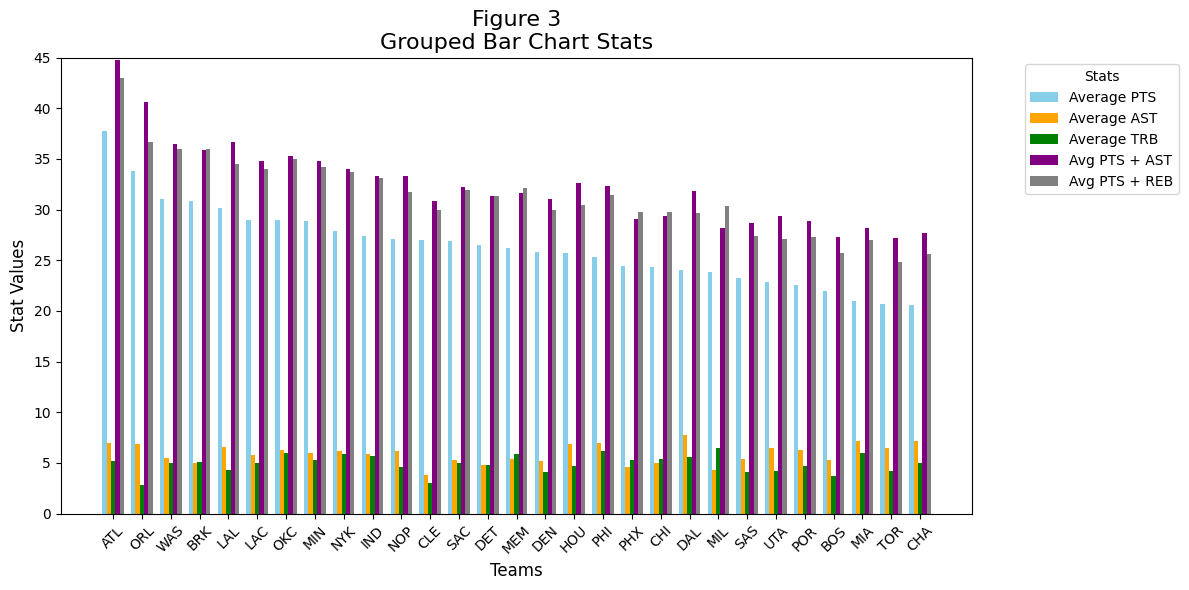

Opponent,Average PTS,Average AST,Average TRB,Average 3P,Average STL,Average BLK,Avg PTS + AST,Avg PTS + REB
ATL,37.80,7.00,5.20,6.40,1.20,0.60,44.80,43.00
ORL,33.83,6.83,2.83,6.00,1.50,0.17,40.66,36.66
WAS,31.00,5.50,5.00,5.50,0.50,0.50,36.50,36.00
BRK,30.86,5.00,5.14,5.86,1.00,0.57,35.86,36.00
LAL,30.15,6.54,4.31,4.62,1.46,0.31,36.69,34.46
LAC,29.00,5.75,5.00,5.42,1.25,0.33,34.75,34.00
OKC,29.00,6.27,6.00,6.00,0.73,0.36,35.27,35.00
MIN,28.83,6.00,5.33,4.92,0.92,0.08,34.83,34.16
NYK,27.86,6.14,5.86,5.14,1.00,0.29,34.00,33.72
IND,27.43,5.86,5.71,5.29,0.71,0.86,33.29,33.14


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from src.data_processing import (
    load_and_prepare_data, group_by_opponent, calculate_team_stats, calculate_filter_stats
)


data = load_and_prepare_data()
grouped_active, _ = group_by_opponent(data)
stat_columns = ["PTS", "AST", "TRB", "3P", "STL", "BLK"]
stats_summary = calculate_team_stats(grouped_active, stat_columns)
filter_stats = calculate_filter_stats(stats_summary)

# Prepare data for plotting
teams = filter_stats["Opponent"]
stats = ["Average PTS", "Average AST", "Average TRB", "Avg PTS + AST", "Avg PTS + REB"]
filter_data = filter_stats[stats].to_numpy()

# Colors for bars
colors = ['skyblue', 'orange', 'green', 'purple', 'gray']

# Create Grouped Bar Chart
x = np.arange(len(teams))  # X positions for teams
width = 0.15  # Bar width

plt.figure(figsize=(12, 6))

# Define a maximum value for the y-axis and set y-axis increments
max_y_value = 45
y_ticks = np.arange(0, max_y_value + 5, 5)  # Increments of 5, from 0 to 40

# Plot the grouped bar chart
for idx, stat in enumerate(stats):
    plt.bar(x + idx * width, filter_data[:, idx], width, label=stat, color=colors[idx])

# Customize chart labels, legend, and layout
plt.title("Figure 3\nGrouped Bar Chart Stats", fontsize=16)
plt.xlabel("Teams", fontsize=12)
plt.ylabel("Stat Values", fontsize=12)
plt.xticks(x + (len(stats) - 1) * width / 2, teams, rotation=45)  # Center x-ticks
plt.yticks(y_ticks)  # Set custom y-axis ticks
plt.ylim(0, max_y_value)  # Set y-axis range

plt.legend(title="Stats", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

# Display a styled table

styled_table = (
    filter_stats.style
    .hide(axis="index")
    .set_caption(
        "Figure 4<br>Stats Against Each Opponent")
    .background_gradient(
        subset=filter_stats.columns.difference(["Opponent"]),
        cmap="PuBu"
    )
    .format(
        {col: "{:.2f}" for col in filter_stats.select_dtypes(include="number").columns}
    )
)
display(styled_table)



Figure 3 displays common stat categories in a grouped bar chart, helping users visualize which opponents Stephen Curry performs better against.

Figure 4 shows a full table of stat averages for each stat category.

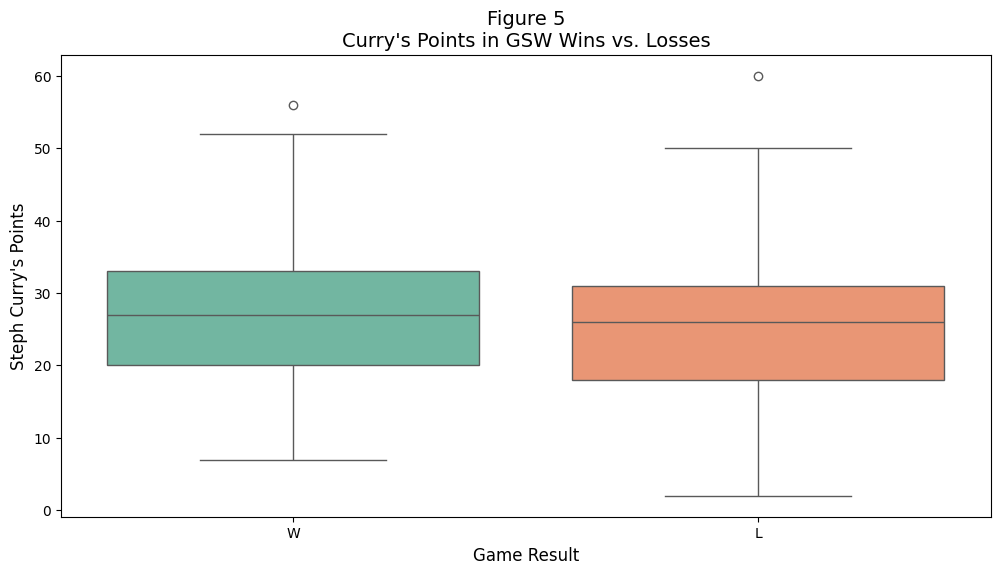

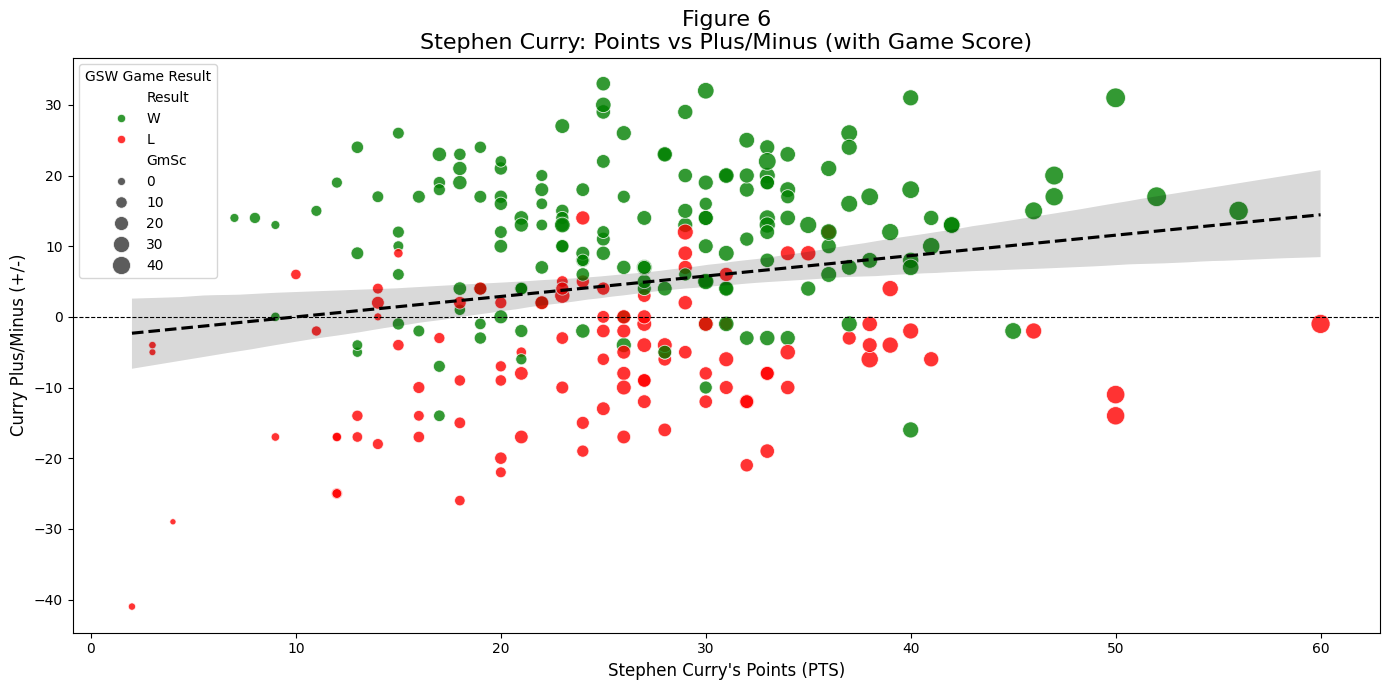

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from src.data_processing import load_and_prepare_data


data = load_and_prepare_data()
data["Result"] = data["Result"].str[0]

# all numeric stats are converted to numerical types
data["PTS"] = pd.to_numeric(data["PTS"], errors="coerce")  # Curry's Points
data["+/-"] = pd.to_numeric(data["+/-"], errors="coerce")  # Plus/Minus stat
data["GmSc"] = pd.to_numeric(data["GmSc"], errors="coerce")  # Game Score

# Visualize Curry's Points in Wins vs. Losses
plt.figure(figsize=(12, 6))
sns.boxplot(
    x="Result",
    y="PTS",
    data=data,
    palette="Set2",
    hue="Result",
    dodge=False,
    legend=False
)

# Customize the plot
plt.title("Figure 5\nCurry's Points in GSW Wins vs. Losses", fontsize=14)
plt.ylabel("Steph Curry's Points", fontsize=12)
plt.xlabel("Game Result", fontsize=12)
plt.show()

# Scatter Plot for PTS vs (+/-) with GmSc as Marker Size
plt.figure(figsize=(14, 7))

# Scatter plot with GmSc as the size of the markers
sns.scatterplot(
    data=data,
    x="PTS",  # Points Scored
    y="+/-",  # Plus/Minus
    hue="Result",  # Color by Win or Loss
    size="GmSc",  # Marker size based on Game Score
    sizes=(20, 200),  # Adjust marker size range
    palette={"W": "green", "L": "red"},  # Win/Loose colors
    alpha=0.8  # Transparency level
)

# Add regression line for trend analysis
sns.regplot(
    data=data,
    x="PTS",
    y="+/-",
    scatter=False,  # Exclude regression line points
    color="black",
    line_kws={"linestyle": "dashed"}  # Dashed regression line
)

# Customize plot
plt.title("Figure 6\nStephen Curry: Points vs Plus/Minus (with Game Score)", fontsize=16)
plt.xlabel("Stephen Curry's Points (PTS)", fontsize=12)
plt.ylabel("Curry Plus/Minus (+/-)", fontsize=12)
plt.axhline(0, color="black", linestyle="--", linewidth=0.8)  # Zero reference
plt.legend(title="GSW Game Result", loc="upper left")
plt.tight_layout()

# Show the plot
plt.show()

Figure 5 is a box plot that shows Stephen Curry's average points per game based on whether his team won or lost. Outliers are displayed as hollow circles. This visualization indicates that Curry's points per game, on average, remain generally consistent regardless of whether the team wins or loses. However, there is a slight trend suggesting that when Curry scores more points, the team is more likely to win. This is evident as the point distribution for games won is slightly higher than that of games lost.

Figure 6 compares Curry's +/- stat with his points scored per game. It also represents his Game Score through the size of the dots on the graph and uses color coding to distinguish whether the game resulted in a win or a loss for the Golden State Warriors (GSW). The graph shows a slight upward trend, indicating that as Curry scores more points, the +/- stat also tends to increase. This trend aligns with a higher likelihood of the team winning. However, the chart also highlights instances when Curry scored many points, yet the team still lost. This demonstrates that while his scoring contributes significantly, wins ultimately depend on overall team performance. Additionally, there is a visual trend showing that lower Game Scores for Curry are associated with more losses for the GSW. This emphasizes that Curry's performance directly impacts the likelihood of the Golden State Warriors winning or losing.

In [6]:
import sys
import os

notebook_dir = os.getcwd()  # Get the working directory
src_path = os.path.join(notebook_dir, "../src")  # Adjust the path to point to the 'src' folder
sys.path.append(src_path)  # Add the 'src' directory to the system path
import pandas as pd
import ipywidgets as widgets
from IPython.display import display, clear_output
from src.model_algo import predict_future_stats, load_stats_summary

# Load the data
stats_summary = load_stats_summary()

# Dropdown Widget for Opponent Acronym
opponent_acronyms = stats_summary["Opponent"].unique().tolist()

opponent_dropdown = widgets.Dropdown(
    options=opponent_acronyms,
    description="Opponent:",
    value=opponent_acronyms[0],  # Default to the first opponent
    style={'description_width': 'initial'}
)

# Dropdown Widget for Target Column
target_columns = [
    "Average PTS", "Average AST", "Average TRB",
    "Average 3P", "Average STL", "Average BLK",
    "Avg PTS + AST", "Avg PTS + REB"
]

target_dropdown = widgets.Dropdown(
    options=target_columns,
    description="Target Stat:",
    value=target_columns[0],  # Default to the first target column
    style={'description_width': 'initial'}
)

# Create an Output Widget
if "output_widget" not in globals():  # If not already created
    output_widget = widgets.Output()


# Callback Function for Making Predictions (Notebook Handles User Interface)
def update_output(opponent_acronym, target_column):
    output_widget.clear_output(wait=True)  # Clear previous output before displaying new content
    with output_widget:
        # Call the prediction function
        prediction_result = predict_future_stats(opponent_acronym)

        # Check if the result is None
        if prediction_result is None:
            print(f"No data available for opponent: {opponent_acronym}.")
            return

        # Unpack the prediction result
        model, scaler, predictions, future_prediction = prediction_result

        # Get the column index of the target column
        target_index = target_columns.index(target_column)

        # Display the selected target column's predicted value for the opponent
        if len(future_prediction) > 0:
            prediction_value = future_prediction[0][target_index]
            print(f"Stephen Curry's predicted {target_column} against {opponent_acronym}: {prediction_value:.2f}")
        else:
            print(f"No valid prediction could be made for opponent: {opponent_acronym}.")



# Create the UI
interactive_ui = widgets.interactive(
    update_output,
    opponent_acronym=opponent_dropdown,
    target_column=target_dropdown
)

# Organize UI Components
final_ui = widgets.VBox([interactive_ui, output_widget])  # Stack dropdown and output widget vertically

display(final_ui)


Above, you can use the Stephen Curry Stat Predictor.

The results indicate that the predictive model is performing significantly better than a simple baseline approach. The baseline, which predicts using the average values, has much higher errors with an RMSE of 1.9430 and MAE of 1.1041. In comparison, this model reduces these errors to an RMSE of 0.6393 and MAE of 0.4736, meaning that, on average, the model's predictions are off by about 0.6393 units (e.g., points, rebounds, or assists) and 0.4736 units. This shows the model is much better at predicting game stats compared to always using the average values from the existing data we have.

Acronyms and Definition Guide:
- **# Games**: The total number of games played
- **FGA**: Field Goal Attempts
- **FG%**: Field Goal Percentage
- **3P**: Three-Point Shots Made
- **3PA**: Three-Point Shot Attempts
- **3P%**: Three-Point Percentage (Percentage of three-point shots made)
- **2P**: Two-Point Shots Made
- **2PA**: Two-Point Shot Attempts
- **2P%**: Two-Point Percentage (Percentage of two-point shots made)
- **eFG%**: Effective Field Goal Percentage (Adjusts field goal percentage, weighting three-pointers higher since they are worth more points)
- **FT**: Free Throws Made
- **FTA**: Free Throw Attempts
- **FT%**: Free Throw Percentage (Percentage of free throws made)
- **REB**: Rebounds
- **ORB**: Offensive Rebounds
- **DRB**: Defensive Rebounds
- **TRB**: Total Rebounds (Offensive and defensive combined)
- **AST**: Assists
- **STL**: Steals
- **BLK**: Blocks
- **TOV**: Turnovers
- **PF**: Personal Fouls
- **PTS**: Points Scored
- **GmSc**: Game Score is a statistic that provides an overall evaluation of a player's performance in a game by combining factors such as points scored, rebounds, assists, steals, and more into a single number. It is designed to quickly assess how impactful or efficient a player's contribution was during a game.
- **+/-**: Plus-Minus measures the point differential of a team while a specific player is on the court, showing how the team's score changes with that player in the game. A positive value indicates the team performs better with the player on the court, while a negative value indicates the opposite.

NBA Teams:
- **ATL**: Atlanta Hawks
- **BOS**: Boston Celtics
- **BRK**: Brooklyn Nets
- **CHA**: Charlotte Hornets
- **CHI**: Chicago Bulls
- **CLE**: Cleveland Cavaliers
- **DAL**: Dallas Mavericks
- **DEN**: Denver Nuggets
- **DET**: Detroit Pistons
- **GSW**: Golden State Warriors
- **HOU**: Houston Rockets
- **IND**: Indiana Pacers
- **LAC**: Los Angeles Clippers
- **LAL**: Los Angeles Lakers
- **MEM**: Memphis Grizzlies
- **MIA**: Miami Heat
- **MIL**: Milwaukee Bucks
- **MIN**: Minnesota Timberwolves
- **NOP**: New Orleans Pelicans
- **NYK**: New York Knicks
- **OKC**: Oklahoma City Thunder
- **ORL**: Orlando Magic
- **PHI**: Philadelphia 76ers
- **PHX**: Phoenix Suns
- **POR**: Portland Trail Blazers
- **SAC**: Sacramento Kings
- **SAS**: San Antonio Spurs
- **TOR**: Toronto Raptors
- **UTA**: Utah Jazz
- **WAS**: Washington Wizards